In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [76]:
from sklearn.datasets import make_classification

In [77]:
##create dataset
x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=42)


In [78]:
x

array([[ 0.96479937, -0.06644898,  0.98676805, ..., -1.2101605 ,
        -0.62807677,  1.22727382],
       [-0.91651053, -0.56639459, -1.00861409, ..., -0.98453405,
         0.36389642,  0.20947008],
       [-0.10948373, -0.43277388, -0.4576493 , ..., -0.2463834 ,
        -1.05814521, -0.29737608],
       ...,
       [ 1.67463306,  1.75493307,  1.58615382, ...,  0.69272276,
        -1.50384972,  0.22526412],
       [-0.77860873, -0.83568901, -0.19484228, ..., -0.49735437,
         2.47213818,  0.86718741],
       [ 0.24845351, -1.0034389 ,  0.36046013, ...,  0.77323999,
         0.1857344 ,  1.41641179]], shape=(1000, 10))

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [80]:
# model training
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [81]:
logistic.fit(x_train,y_train)


LogisticRegression()

In [82]:
y_pred=logistic.predict(x_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [83]:
logistic.predict_proba(x_test)

array([[7.74477909e-01, 2.25522091e-01],
       [3.36684957e-02, 9.66331504e-01],
       [6.70682154e-01, 3.29317846e-01],
       [7.98668032e-02, 9.20133197e-01],
       [9.76616650e-01, 2.33833501e-02],
       [4.13572804e-02, 9.58642720e-01],
       [9.79028767e-01, 2.09712329e-02],
       [9.59367261e-01, 4.06327393e-02],
       [8.08520049e-01, 1.91479951e-01],
       [6.84954318e-01, 3.15045682e-01],
       [9.13669448e-01, 8.63305524e-02],
       [2.63597018e-01, 7.36402982e-01],
       [5.25844192e-01, 4.74155808e-01],
       [2.11912354e-01, 7.88087646e-01],
       [7.93592056e-01, 2.06407944e-01],
       [9.46621678e-01, 5.33783219e-02],
       [2.62957933e-02, 9.73704207e-01],
       [3.24212617e-01, 6.75787383e-01],
       [3.14803584e-01, 6.85196416e-01],
       [2.04956217e-01, 7.95043783e-01],
       [5.04587065e-01, 4.95412935e-01],
       [9.66703630e-01, 3.32963696e-02],
       [2.00514796e-01, 7.99485204e-01],
       [7.77891908e-01, 2.22108092e-01],
       [8.729863

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [85]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## 006.grid search hyper parameter 

In [86]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']


In [87]:
params=dict(
    penalty=penalty,
    C=c_values,
    solver=solver)

In [88]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [89]:
from sklearn.model_selection import StratifiedKFold 
cv=StratifiedKFold()

In [90]:
##gridsearch
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [91]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [92]:

grid.fit(x_train,y_train)


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [93]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [94]:
grid.best_score_

np.float64(0.8785714285714287)

In [95]:
y_pred=grid.predict(x_test)

In [96]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

## 007.RANDOMISED SEARCHCV

In [97]:
from sklearn.model_selection import RandomizedSearchCV


In [98]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [99]:
randomcv.fit(x_train,y_train)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [100]:
randomcv.best_score_

np.float64(0.8700000000000001)

In [101]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}

In [102]:
y_pred=randomcv.predict(x_test)

In [103]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8466666666666667
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       155
           1       0.80      0.91      0.85       145

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

[[122  33]
 [ 13 132]]


## 008.Logistic OVR

logistic Regression For Multiclass Classification Problem

In [105]:
#the dataset
x,y=make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=42)

In [ ]:
x,y

(array([[ 0.7715326 , -1.47433614,  2.19664605, ...,  0.68174341,
          1.08996189,  0.96250289],
        [ 1.85838284, -3.68087983,  0.22749588, ..., -0.47417818,
          1.34113888, -0.77177196],
        [-0.98724764,  1.53916836,  0.5859042 , ..., -0.32202815,
         -1.45103394,  1.32543211],
        ...,
        [-1.227082  ,  1.65602784,  0.47263035, ..., -0.8634936 ,
         -1.83932326, -0.03120349],
        [ 1.28527572, -0.29715202, -0.67172079, ..., -1.31544131,
          2.85446468,  1.3094441 ],
        [-0.75428048,  0.88516075, -1.6728939 , ..., -2.0362205 ,
         -1.43989584,  0.04749347]], shape=(1000, 10)),
 array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
        2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
        2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
        0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
        0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression 
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.68
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       113
           1       0.40      0.58      0.47        65
           2       0.86      0.71      0.78       122

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.72      0.68      0.70       300

[[79 31  3]
 [16 38 11]
 [ 8 27 87]]


##hyper parameter tuning for multiclass   using gridsearch


In [ ]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']


In [ ]:
params={
    'penalty':penalty,
    'C':c_values,
    'solver':solver}

In [ ]:
from sklearn.model_selection import StratifiedKFold 
cv=StratifiedKFold()

In [ ]:
##gridsearch
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
grid.best_score_

np.float64(0.6528571428571428)

In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1,
       0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2,
       1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0])

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.7033333333333334
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       109
           1       0.45      0.63      0.52        68
           2       0.89      0.73      0.80       123

    accuracy                           0.70       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.74      0.70      0.72       300

[[78 28  3]
 [17 43  8]
 [ 8 25 90]]


## 009.logistic Regression for imbalenced dataset 


In [106]:
from collections import Counter
from sklearn.datasets import make_classification

In [107]:
x,y=make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [108]:
x

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [109]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [110]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

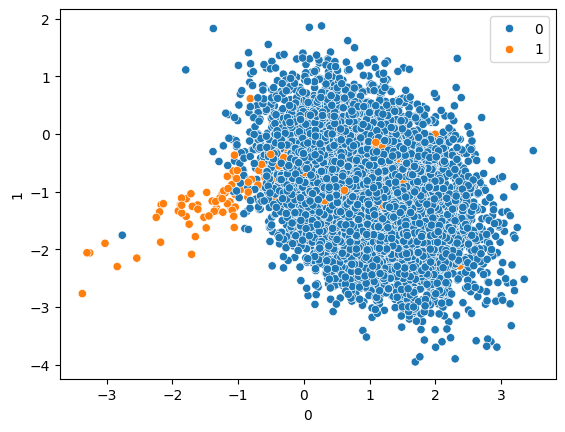

In [111]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1],hue=y)
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [113]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg','lbfgs','liblinear','sag','saga']
class_weight=[{0:w,1:y}for w in [1,10,50,100] for y in [1,10,50,100]]


In [114]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [115]:
params=dict(
    penalty=penalty,
    C=c_values,
    solver=solver,class_weight=class_weight)

In [116]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [117]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [118]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)


In [119]:
grid.fit(x_train,y_train)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [120]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [121]:
grid.best_score_

np.float64(0.9882666666666667)

In [122]:
y_pred=grid.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

In [123]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_test,y_pred)
print(score)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9896
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500

[[2465    0]
 [  26    9]]


## 010.LOGISTIC REGRESSION ROC


logistic regression with ROC curve and ROC AUC score

In [124]:
#roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [125]:
x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=1)

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [127]:
#created a dummy model with default 0 as output dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob=[0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [128]:
##lets create basic logistic model
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [132]:
##prediction based on probability
model_prob=model.predict_proba(x_test)
#lets focus on the positive class
model_prob

array([[7.61998521e-01, 2.38001479e-01],
       [4.96074475e-02, 9.50392553e-01],
       [3.70596352e-01, 6.29403648e-01],
       [1.60663700e-03, 9.98393363e-01],
       [1.53000052e-01, 8.46999948e-01],
       [9.26720080e-01, 7.32799198e-02],
       [5.69482889e-01, 4.30517111e-01],
       [1.60446637e-01, 8.39553363e-01],
       [9.49229902e-01, 5.07700978e-02],
       [9.86910208e-01, 1.30897915e-02],
       [1.39996929e-01, 8.60003071e-01],
       [9.57418054e-01, 4.25819459e-02],
       [7.61750091e-02, 9.23824991e-01],
       [1.56300065e-01, 8.43699935e-01],
       [9.21999646e-01, 7.80003542e-02],
       [9.23023278e-01, 7.69767221e-02],
       [1.86905764e-01, 8.13094236e-01],
       [9.86137065e-01, 1.38629346e-02],
       [9.38812087e-01, 6.11879126e-02],
       [7.01635858e-03, 9.92983641e-01],
       [2.01656173e-01, 7.98343827e-01],
       [1.09906180e-01, 8.90093820e-01],
       [7.59664999e-01, 2.40335001e-01],
       [2.98420881e-01, 7.01579119e-01],
       [9.695912

In [136]:
model_prob=model_prob[:,1]

In [147]:
model_prob


array([2.38001479e-01, 9.50392553e-01, 6.29403648e-01, 9.98393363e-01,
       8.46999948e-01, 7.32799198e-02, 4.30517111e-01, 8.39553363e-01,
       5.07700978e-02, 1.30897915e-02, 8.60003071e-01, 4.25819459e-02,
       9.23824991e-01, 8.43699935e-01, 7.80003542e-02, 7.69767221e-02,
       8.13094236e-01, 1.38629346e-02, 6.11879126e-02, 9.92983641e-01,
       7.98343827e-01, 8.90093820e-01, 2.40335001e-01, 7.01579119e-01,
       3.04087645e-02, 2.72212884e-01, 1.90395439e-02, 7.51377934e-01,
       2.05202364e-01, 7.02317608e-01, 8.61998537e-01, 9.67062498e-01,
       9.39021490e-04, 8.00611511e-01, 9.71613468e-01, 8.76611169e-01,
       1.38039999e-03, 3.59258298e-02, 9.42180314e-01, 7.78192134e-01,
       9.88431417e-03, 9.95830269e-01, 6.64231995e-01, 3.47836821e-02,
       9.58583323e-01, 2.92690219e-02, 9.66098006e-02, 9.91643799e-01,
       4.61986456e-02, 8.57615624e-01, 9.88042291e-01, 4.29703058e-01,
       1.83935398e-01, 2.33505181e-01, 3.10092359e-01, 1.87541642e-02,
      

In [148]:
##lets calulate  the  scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.922092055566225


In [156]:
##calculate Roc curve
dummy_fpr,dummy_tpr,_=roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,thresholds=roc_curve(y_test,model_prob)

In [157]:
thresholds

array([           inf, 9.99214703e-01, 9.38495147e-01, 9.33678517e-01,
       8.83474442e-01, 8.77864380e-01, 8.76611169e-01, 8.75606294e-01,
       8.43155701e-01, 8.40935754e-01, 8.39553363e-01, 8.26947068e-01,
       8.20254375e-01, 8.17797022e-01, 8.12173094e-01, 8.07315700e-01,
       8.05141316e-01, 8.03665358e-01, 7.55811252e-01, 7.31244770e-01,
       6.87337500e-01, 6.78499826e-01, 6.71753010e-01, 6.64231995e-01,
       6.33484940e-01, 6.29718406e-01, 6.03479518e-01, 5.98015441e-01,
       5.88066117e-01, 5.76958892e-01, 4.84481823e-01, 4.82520197e-01,
       4.30517111e-01, 4.13554585e-01, 4.10157904e-01, 3.50728848e-01,
       3.46090845e-01, 2.76052884e-01, 2.72212884e-01, 2.33505181e-01,
       2.27281896e-01, 2.05983813e-01, 2.05202364e-01, 1.77614859e-01,
       1.68824128e-01, 1.59953732e-01, 1.57347157e-01, 1.33389711e-01,
       1.29109911e-01, 9.88015941e-02, 9.66098006e-02, 7.32799198e-02,
       7.32654864e-02, 6.11879126e-02, 5.66537906e-02, 5.29389590e-02,
      

In [158]:
model_fpr

array([0.        , 0.        , 0.        , 0.00787402, 0.00787402,
       0.01574803, 0.01574803, 0.02362205, 0.02362205, 0.03149606,
       0.03149606, 0.03937008, 0.03937008, 0.04724409, 0.04724409,
       0.05511811, 0.05511811, 0.06299213, 0.06299213, 0.08661417,
       0.08661417, 0.1023622 , 0.1023622 , 0.11023622, 0.11023622,
       0.13385827, 0.13385827, 0.14173228, 0.14173228, 0.1496063 ,
       0.1496063 , 0.15748031, 0.15748031, 0.18897638, 0.18897638,
       0.21259843, 0.21259843, 0.25984252, 0.25984252, 0.30708661,
       0.30708661, 0.34645669, 0.34645669, 0.37007874, 0.37007874,
       0.39370079, 0.39370079, 0.42519685, 0.42519685, 0.46456693,
       0.46456693, 0.51181102, 0.51181102, 0.5511811 , 0.5511811 ,
       0.57480315, 0.57480315, 0.63779528, 0.63779528, 1.        ])

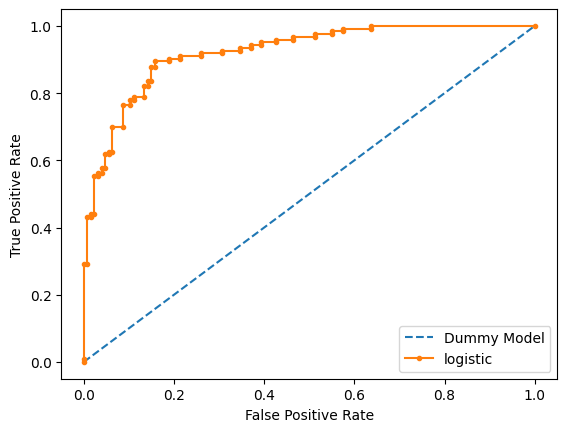

In [159]:
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='logistic')
#axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [160]:
import numpy as np
np.round(2.5234,decimals=2)

np.float64(2.52)

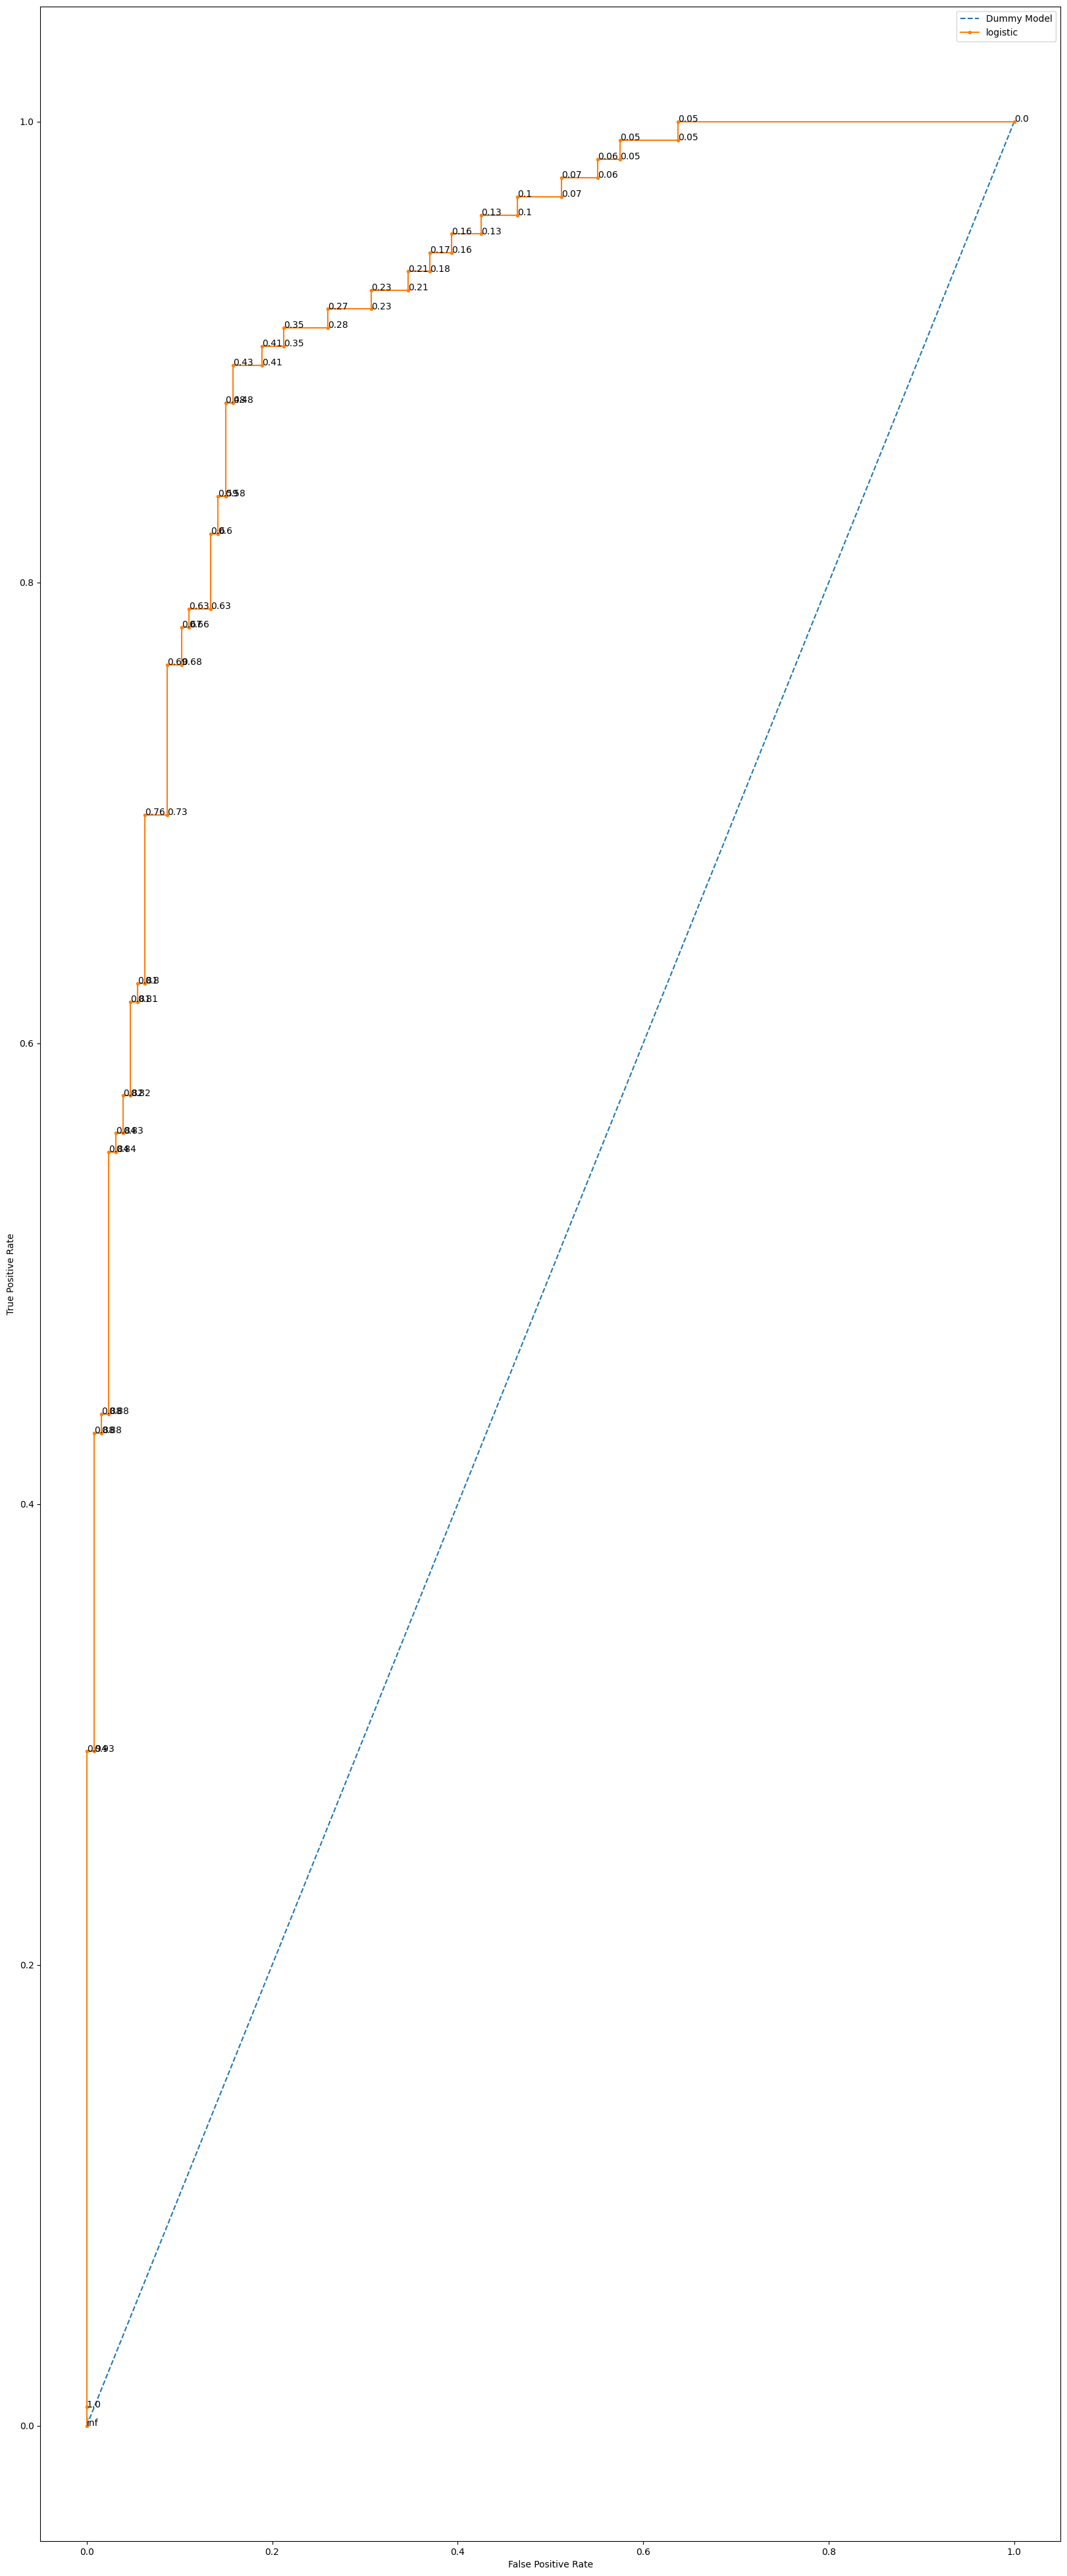

In [168]:
#plot the roc curve for the model
import numpy as np
fig=plt.figure(figsize=(20,50))
ax=fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='logistic')
#axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
plt.show()